In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# do not forget t change the file for each local computer
df = pd.read_csv('/Users/mahmoud/Documents/Flatiron/Project_1_Microsoft_Movie_Studio/1_Data_Wranging/genre_profit.csv')
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [6]:
df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,2015,101.00000,Crime,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
1,#Horror,2015,101.00000,Drama,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
2,#Horror,2015,101.00000,Horror,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
3,10 Cloverfield Lane,2016,103.00000,Drama,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
4,10 Cloverfield Lane,2016,103.00000,Horror,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
...,...,...,...,...,...,...,...,...,...
7198,Zulu,2013,110.00000,Drama,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7199,Zulu,2013,110.00000,Thriller,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7200,xXx: Return of Xander Cage,2017,107.00000,Action,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000
7201,xXx: Return of Xander Cage,2017,107.00000,Adventure,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000


In [7]:
# removing $ sign 
df['production_budget'] = df['production_budget'].str.replace('$', '')
# removing ,
df['production_budget'] = df['production_budget'].str.replace(',', '')
# changing type of production budget to float
df['production_budget'] = df['production_budget'].astype(float)

In [8]:
# creating a column world profit to track the profit of each movie
df['world_profit'] = df['worldwide_gross'] - df['production_budget']

In [9]:
#creating a csv file for our new profit column
df.to_csv('world_profit.csv')

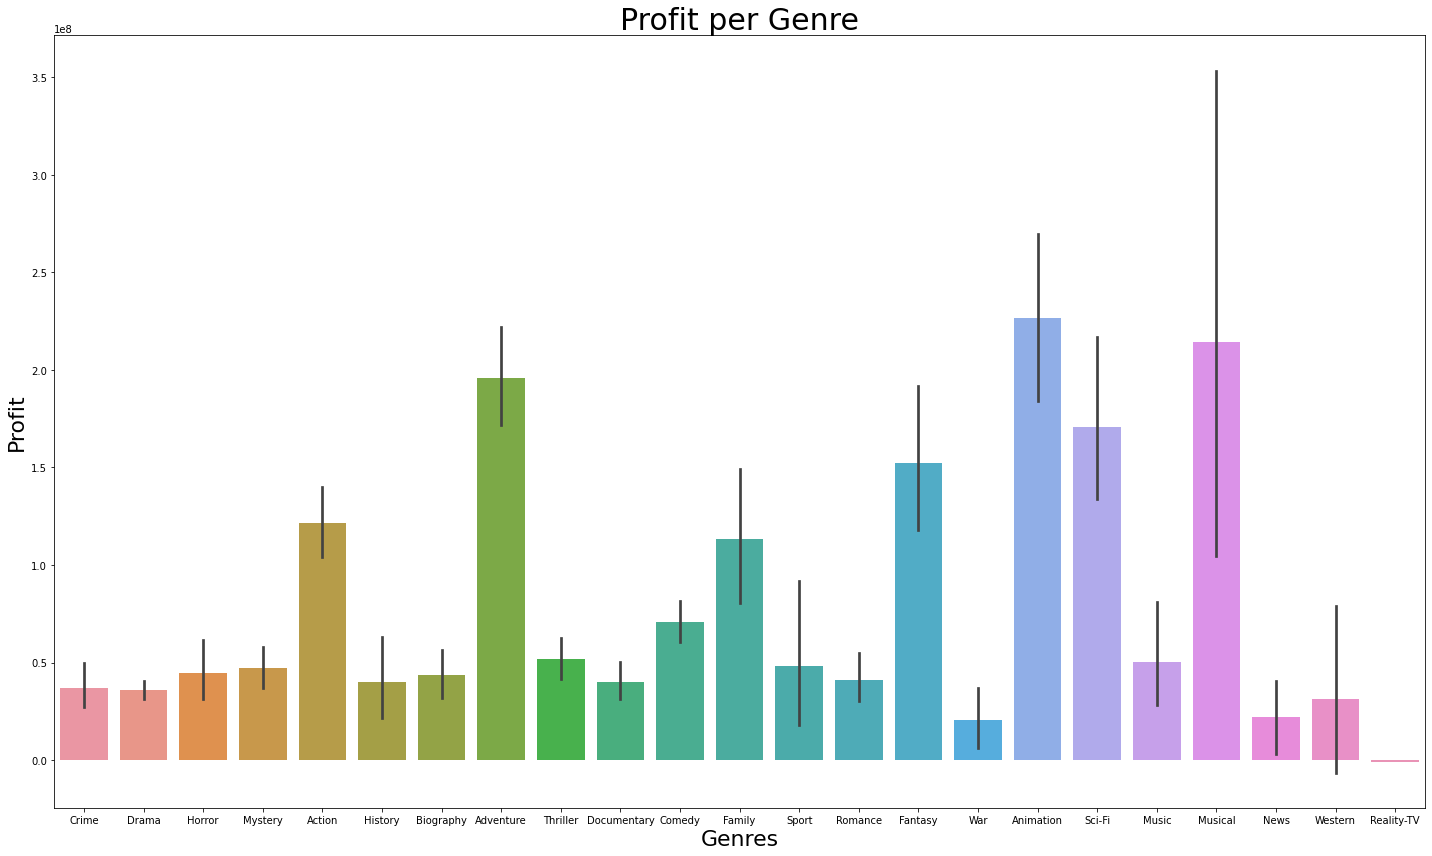

In [10]:
# here we are creating a bar chart to compare the genres with the profit of each movie (world_profit)
fig, ax = plt.subplots(figsize = (20,12))
sns.barplot(x = 'genres', y = 'world_profit', data = df,  ax = ax)
ax.set_title('Profit per Genre', fontsize=30)
ax.set_ylabel('Profit', fontsize=22)
ax.set_xlabel('Genres', fontsize=22)
fig.tight_layout();

In [11]:
# the genres that generated most profit
# this allows us to focus only on the genres that generated most profit. 
#excluding musical due to the fact that it has a large mean

new_df = df.query("genres in ('Action','Adventure', 'Family', 'Fantasy', 'Animation', 'Sci-Fi')")

In [12]:
# sort values based on world_profit from most profit to least
new_df = new_df.sort_values(by = 'world_profit', ascending = False)

In [13]:
new_df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,world_profit
6538,Titanic,2018,115.00000,Family,43,"Dec 19, 1997",200000000.00000,659363944.00000,2208208395.00000,2008208395.00000
535,Avengers: Infinity War,2018,149.00000,Sci-Fi,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
534,Avengers: Infinity War,2018,149.00000,Adventure,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
533,Avengers: Infinity War,2018,149.00000,Action,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
2893,Jurassic World,2015,124.00000,Sci-Fi,34,"Jun 12, 2015",215000000.00000,652270625.00000,1648854864.00000,1433854864.00000
...,...,...,...,...,...,...,...,...,...,...
3350,Mars Needs Moms,2011,88.00000,Animation,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
3349,Mars Needs Moms,2011,88.00000,Adventure,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
1344,Dark Phoenix,2019,113.00000,Sci-Fi,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
1343,Dark Phoenix,2019,113.00000,Adventure,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000


In [14]:
# creating csv file for the most generated profit genres
new_df.to_csv('world_profit_per_six_genres.csv')

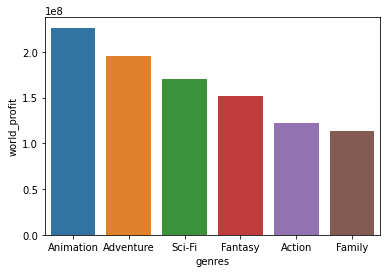

In [15]:
#average profit per genre; step we took to find the mean
genre_bar_df = new_df.groupby('genres').mean().sort_values(by = 'world_profit', ascending = False)

sns.barplot(data = genre_bar_df, x = genre_bar_df.index, y = 'world_profit');

In [16]:
# did this to see if the average profit per genre matched the bar chart, answer is yes
genre_bar_df

,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,world_profit
genres,,,,,,,
Animation,2014.29927,89.01460,47.70073,83208593.04380,114015296.70073,309584024.68613,226375431.64234
Adventure,2014.31130,106.36674,49.08742,88734038.60554,102145156.39232,284518742.31983,195784703.71429
Sci-Fi,2014.41981,107.16981,52.84906,67721530.06132,88776263.41038,238311481.42453,170589951.36321
Fantasy,2013.95109,107.33152,50.81522,68741245.90761,80885244.01630,220873233.27717,152131987.36957
Action,2014.11437,109.32303,49.96754,64847820.71097,69544024.60124,186538758.79444,121690938.08346
Family,2013.88889,90.66138,54.36508,48025990.72487,68700203.86772,161485053.47090,113459062.74603


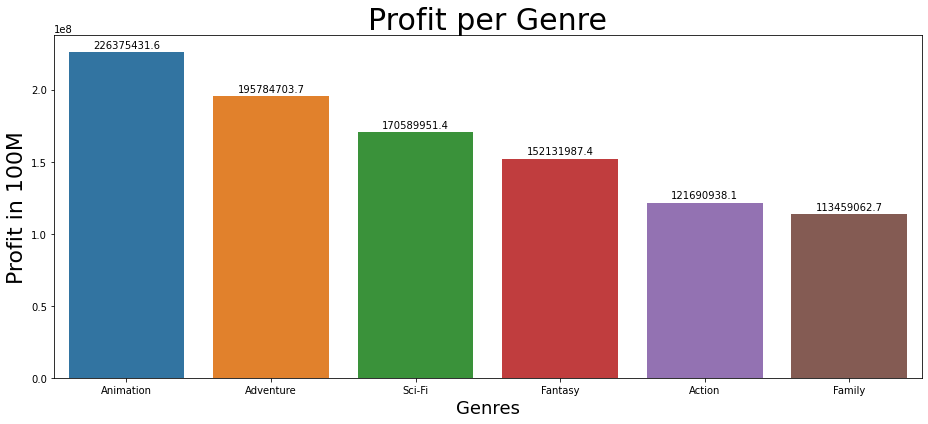

In [18]:
# here we are creating a bar chart for the genres which have generated above 100 million profit + average profit per 
fig, ax = plt.subplots(figsize = (13,6))
sns.barplot(data = genre_bar_df, x = genre_bar_df.index, y = 'world_profit', ax=ax) 
#gives the average profit per genre (# wise on top of each bar)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Profit in 100M', fontsize=22)
ax.set_title('Profit per Genre', fontsize = 30)
#plt.legend(loc=1)
plt.tick_params(labelsize=10)
fig.tight_layout();

In [22]:
import plotly.express as px

fig = px.bar(genre_bar_df, x = genre_bar_df.index, y = 'world_profit', text='world_profit',
            labels={
                     "genres":"Genres",
                     "world_profit": "Profit in 100M",
                 },
            color="world_profit", color_continuous_scale=px.colors.sequential.Tealgrn)


fig.update_layout(
    title=dict(text="Profit per Genre", font=dict(size=20)),
    font=dict(
        size=14,)
)



fig.update_traces(texttemplate='%{text:.5s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()